<a href="https://colab.research.google.com/github/willysun0819/Android-Camera-Video-In/blob/master/08_Cifar_10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [ ]:
print(Y_train[0])    #6代表青蛙

[6]


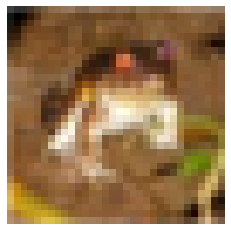

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='binary')
plt.axis("off")

plt.show()

In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.utils import to_categorical

seed = 10
np.random.seed(seed)

In [ ]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3 ), padding="same",
                 input_shape = X_train.shape[1:], activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=9, batch_size=128, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 10000 samples
Epoch 1/9





 - 84s - loss: 1.6477 - acc: 0.3967 - val_loss: 1.3070 - val_acc: 0.5414
Epoch 2/9
 - 83s - loss: 1.2761 - acc: 0.5412 - val_loss: 1.0980 - val_acc: 0.6211
Epoch 3/9
 - 83s - loss: 1.1339 - acc: 0.5975 - val_loss: 1.0274 - val_acc: 0.6426
Epoch 4/9
 - 83s - loss: 1.0491 - acc: 0.6278 - val_loss: 0.9736 - val_acc: 0.6717
Epoch 5/9
 - 84s - loss: 0.9824 - acc: 0.6520 - val_loss: 0.9199 - val_acc: 0.6849
Epoch 6/9
 - 84s - loss: 0.9328 - acc: 0.6709 - val_loss: 0.8778 - val_acc: 0.7011
Epoch 7/9
 - 83s - loss: 0.8866 - acc: 0.6870 - val_loss: 0.8522 - val_acc: 0.7053
Epoch 8/9
 - 82s - loss: 0.8456 - acc: 0.7011 - val_loss: 0.8212 - val_acc: 0.7203
Epoch 9/9
 - 83s - loss: 0.8107 - acc: 0.7168 - val_loss: 0.8281 - val_acc: 0.7137


In [ ]:
loss, accuracy = model.evaluate(X_train, Y_train)
print("Training set accuracy:",accuracy)
loss, accuracy = model.evaluate(X_test, Y_test)
print("Testing set accuracy",accuracy)

50000/50000 [==============================] - 30s 595us/step
Training set accuracy: 0.77638
10000/10000 [==============================] - 6s 582us/step
Testing set accuracy 0.7072


In [ ]:
model.save("cifar10.h5")

Predicting ...


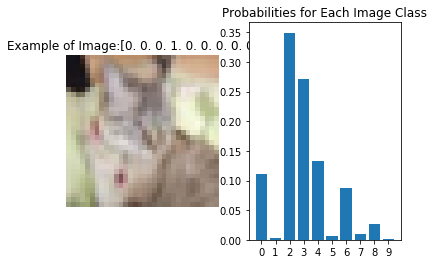

In [ ]:
i = 8
img = X_test[i]
# 將圖片轉換成 4D 張量
X_test_img = img.reshape(1, 32, 32, 3).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_test_img = X_test_img / 255

# 繪出圖表的預測結果
plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Image:" + str(Y_test[i]))
plt.imshow(img, cmap="binary")
plt.axis("off")
# 預測結果的機率
print("Predicting ...")
probs = model.predict_proba(X_test_img, batch_size=1)
plt.subplot(1,2,2)
plt.title("Probabilities for Each Image Class")
plt.bar(np.arange(10), probs.reshape(10), align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()